# Welcome to Jupyter!

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

#CODE EXPLAINED IN REPORT!!!

In [6]:
x = list(range(32))
#The pandas library automatically parses the dataset, from a csv file, is uses the vector x as a naming convention. I chose a numbering of the columns from 0-31, so the dataframe can essentially be taught like a matrix.
df = pandas.read_csv('wdbc.dataset', names = x)
#In order to parse the dataset efficiently, we convert the dataset into a pandas data-frame.
transform = {"M": 1, "B": 0}
#I parse the dataset to code “M” as a 1 and “B” as a 0.
Y = np.array([transform[i] for i in df[1]])
#I stored all the labels into a vector called Y by using list comprehension
X = np.array([np.array((df[i]-min(df[i]))/(max(df[i])-min(df[i]))) for i in range(2,32)])
#Here I took each column df[i] subtracted the minimum then divided by the range. Then I used the list comprehension to store all of the columns into a single array.

In [7]:
indexing = np.array(range(len(X[0])))
np.random.shuffle(indexing)
X = X[:,indexing]
Y = Y[indexing]
#Here I shuffled the indexes of an array
#Then used numpy indexing, to index the numpy array in order to give X and Y this new random ordering. The reason indexing was used, so the same shuffling can be applied to both X and Y.

In [8]:
a = int((len(X[0])*0.8))
b = int((len(X[0])*0.1))
X_train = X[:,:a]
X_val = X[:,a:a+b]
X_test = X[:,a+b:]
Y_train = Y[:a]
Y_val = Y[a:a+b]
Y_test = Y[a+b:]
#This is was used to code that 80% was testing, while 10% was for validation and the rest (which is 10%) is used for testing.

In [9]:
epochs = 1000
m = X_train.shape[1]
#Epochs is the number of iterations we are going to run our gradient descent algorithm to figure out our weights for the logistic regression algorithm

In [10]:
def sigmoid(z):
	if z > 0:
		return np.reciprocal(1 + np.exp(-z))
	return 1-np.reciprocal(1 + np.exp(z))
#This is the sigmoid function. If our value is positive we follow the strict definition. If our value is negative we must rewrite the sigmoid function to avoid evaluating big posisitive exponents. For example if x is -10000, our algorithm needs to compute e^10000 which is astronomically large. So how do we rewrite the sigmoid function? Using a bit algebra we get this 1/(1+e^-x) = e^x/(1+e^x) = 1-1/(1+e^x).

In [11]:
w = np.random.randn(X_train.shape[0], 1)*0.01
win = copy.deepcopy(w)
b = 0 
maxtup = (0,0)
np.seterr(divide = 'ignore')
alpha = list(range(-5,5))
alpha = [10**(i) for i in alpha]
#Here we randomize our initial weight vector. We use the guassian normal function to our weights. The shape of our weight function is given by the first component of X_train.
#This is the range of learning rates that we are trying to apply. It ranges from 10^-5 to 10^5. We look through alpha and try different learning rates to see which one gives the best F-score.

In [12]:
for learningrate in alpha:
	for epoch in range(epochs):
		z = np.dot(w.T, X_train) + b
		p = np.array([sigmoid(i) for i in z[0]])
		cost = -np.sum(np.multiply(np.log(p), Y_train) + np.multiply((1 - Y_train), np.log(1 - p)))/m 
		dz = p-Y_train
		dw = (1 / m) * np.dot(X_train, dz.T)
		db = (1 / m) * np.sum(dz)
		w = w - learningrate * dw
		b = b - learningrate * db

	z = np.dot(w.T, X_val) + b
	Y_testval = np.round(np.array([sigmoid(i) for i in z[0]]))
	TP = np.dot(Y_testval,Y_val.T)
	TN = np.count_nonzero((Y_testval+Y_val)==0)
	FP = np.count_nonzero((2*Y_testval+Y_val)==2)
	FN = np.count_nonzero((Y_testval+2*Y_val)==2)
	Precision = TP/(TP+FP)
	Recall = TP/(TP+FN)
	F1 = 2/(1/Recall+1/Precision)
	if F1> maxtup[0]:
		maxtup = (F1,learningrate)
#This code was borough from the medium article in Sri hari’s notes. We loop through each learning rate. We loop through it by the number of epochs to run it epoch times. Z calculated the dot product of the weight and the X_train.
#This code is throughly in report, involves lots of detail!

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


In [13]:
learningrate = maxtup[1]
w = win
b = 0 
acctrack = []

#reinitializing everything!



In [14]:

for epoch in range(epochs):
		z = np.dot(w.T, X_train) + b
		p = np.array([sigmoid(i) for i in z[0]])
		cost = -np.sum(np.multiply(np.log(p), Y_train) + np.multiply((1 - Y_train), np.log(1 - p)))/m 
		dz = p-Y_train
		dw = (1 / m) * np.dot(X_train, dz.T)
		db = (1 / m) * np.sum(dz)
		w = w - learningrate * dw
		b = b - learningrate * db
		TP_test = np.dot(np.round(p),Y_train.T)
		TN_test = np.count_nonzero((np.round(p)+Y_train)==0)
		acctrack.append((TP_test+TN_test)/(len(Y_train)))

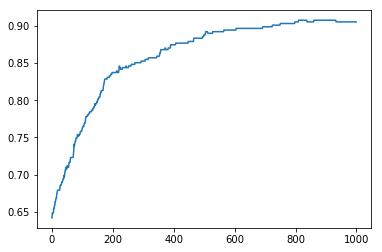

In [15]:
plt.plot(list(range(epochs)),acctrack)

plt.show()

In [16]:
z = np.dot(w.T, X_test) + b
Y_testval = np.round(np.array([sigmoid(i) for i in z[0]]))
TP = np.dot(Y_testval,Y_test.T)
TN = np.count_nonzero((Y_testval+Y_test)==0)
FP = np.count_nonzero((2*Y_testval+Y_test)==2)
FN = np.count_nonzero((Y_testval+2*Y_test)==2)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1 = 2/(1/Recall+1/Precision)
print(str((TP+TN)/(len(Y_test))*100)+"% accuracy")
print(str(Precision*100)+"% precision")
print(str(Recall*100)+"% recall")

#Running on test set!!

87.93103448275862% accuracy
90.0% precision
78.26086956521739% recall


This repo contains an introduction to [Jupyter](https://jupyter.org) and [IPython](https://ipython.org).

Outline of some basics:

* [Notebook Basics](../examples/Notebook/Notebook%20Basics.ipynb)
* [IPython - beyond plain python](../examples/IPython%20Kernel/Beyond%20Plain%20Python.ipynb)
* [Markdown Cells](../examples/Notebook/Working%20With%20Markdown%20Cells.ipynb)
* [Rich Display System](../examples/IPython%20Kernel/Rich%20Output.ipynb)
* [Custom Display logic](../examples/IPython%20Kernel/Custom%20Display%20Logic.ipynb)
* [Running a Secure Public Notebook Server](../examples/Notebook/Running%20the%20Notebook%20Server.ipynb#Securing-the-notebook-server)
* [How Jupyter works](../examples/Notebook/Multiple%20Languages%2C%20Frontends.ipynb) to run code in different languages.

You can also get this tutorial and run it on your laptop:

    git clone https://github.com/ipython/ipython-in-depth

Install IPython and Jupyter:

with [conda](https://www.anaconda.com/download):

    conda install ipython jupyter

with pip:

    # first, always upgrade pip!
    pip install --upgrade pip
    pip install --upgrade ipython jupyter

Start the notebook in the tutorial directory:

    cd ipython-in-depth
    jupyter notebook